# Stock Price Prediction

### Project to predict the prices of Stocks by using various Machine Learning Models and picking best out of them.

### Each data science problem is solved in different stages/steps
### We will also implement same in our project 'Stock Price Prediction'


# Step 1 : Business Understanding or rather Problem Understanding

### In our Project we have to predict the stock prices of Tesla, a car company on a given date.

# Step 2 : Collecting data for training and testing Model

#               Or Data Collection

In [1]:
import pandas as pd
# Pandas library is helpful in dealing with data by using Series and DataFrames.

import numpy as np
# Numpy library is used to work with Arrays efficiently

In [2]:
data=pd.read_csv('TSLA.csv')      # read_csv() function of Pandas is used to read data from .csv file and convert it into
                                   # dataframe object.

data.head()                       # head(n) is used to show first n records. n is 5 by default.

Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

In [3]:
data.shape                        # shape gives dimensions of the dataframe or Series in form (r,c) 
                                  # where r is rows and c is column

(3077, 7)

In [4]:
data.columns                      # columns lists the name of all columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.info()                       # info() gives information about the type of data stored in columns of dataframe / Series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3077 non-null   object 
 1   Open       3077 non-null   float64
 2   High       3077 non-null   float64
 3   Low        3077 non-null   float64
 4   Close      3077 non-null   float64
 5   Adj Close  3077 non-null   float64
 6   Volume     3077 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 168.4+ KB


In [6]:
data.describe()                  # describe() gives the statistical information about each column such as mean, count, etc.

Open         High          Low        Close    Adj Close  \
count  3077.000000  3077.000000  3077.000000  3077.000000  3077.000000   
mean     55.405059    56.647893    54.064774    55.395610    55.395610   
std      93.814525    95.981686    91.416668    93.744898    93.744898   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%       8.105333     8.319333     7.968000     8.107333     8.107333   
50%      15.970000    16.230000    15.680000    15.992000    15.992000   
75%      23.584000    23.908001    23.224001    23.519333    23.519333   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.077000e+03  
mean   9.347589e+07  
std    8.242573e+07  
min    1.777500e+06  
25%    4.144350e+07  
50%    7.544250e+07  
75%    1.174650e+08  
max    9.140820e+08

# Step 2 : Data Preparation

In [7]:
data.isna().values.any()        # isna() gives information about na values, values then list all those rows, and any() at 
                                # last tells whether any such row exists or not

False

In [8]:
from datetime import datetime as dt

def toOrdinal(x):
    return dt.strptime(x, "%Y-%m-%d").date().toordinal()

data['ordinal'] = data.Date.apply(lambda x : toOrdinal(x))
data.set_index('ordinal',inplace=True)
data

Date        Open        High         Low       Close  \
ordinal                                                               
733952   2010-06-29    1.266667    1.666667    1.169333    1.592667   
733953   2010-06-30    1.719333    2.028000    1.553333    1.588667   
733954   2010-07-01    1.666667    1.728000    1.351333    1.464000   
733955   2010-07-02    1.533333    1.540000    1.247333    1.280000   
733959   2010-07-06    1.333333    1.333333    1.055333    1.074000   
...             ...         ...         ...         ...         ...   
738410   2022-09-12  300.720001  305.489990  300.399994  304.420013   
738411   2022-09-13  292.899994  297.399994  290.399994  292.130005   
738412   2022-09-14  292.239990  306.000000  291.640015  302.609985   
738413   2022-09-15  301.829987  309.119995  300.720001  303.750000   
738414   2022-09-16  299.609985  303.709991  295.600006  303.350006   

          Adj Close     Volume  
ordinal                         
733952     1.592667  281494500  
733953     1.588667  257806500  
733954     1.464000  123282000  
733955     1.280000   77097000  
733959     1.074000  103003500  
...             ...        ...  
738410   304.420013   48674600  
738411   292.130005   68229600  
738412   302.609985   72628700  
738413   303.750000   64795500  
738414   303.350006   86949500  

[3077 rows x 7 columns]

# Step 3 : Exploratory Data Analysis

In [9]:
# Importing Modules used for visualizing data

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='Volume in 1e7'>

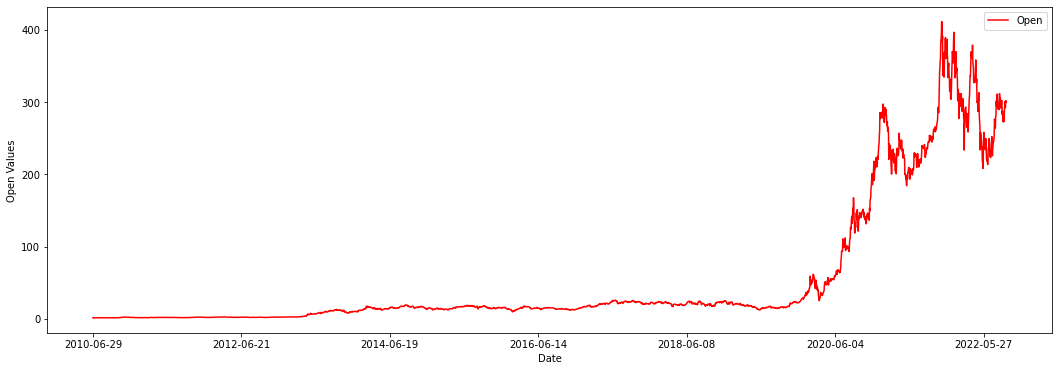

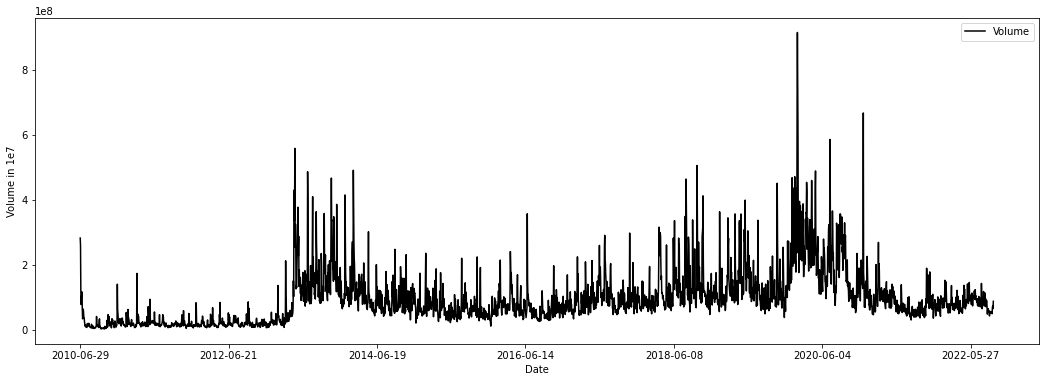

In [10]:
plt.rcParams['figure.figsize']=(18,6)    # It sets the various parameters for plots in this case it is setting Figure Size

data.plot('Date','Open', ylabel='Open Values',color='red')      # Plotting Opening Price of Stocks with dates

data.plot('Date','Volume',ylabel='Volume in 1e7',color='black') # Plotting Volume of trade occured with dates 

In [11]:
data[data['Close']!=data['Adj Close']]    # Checking whether Close column and Adj Close column contain same data or not

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

In [12]:
data.drop('Adj Close',axis=1,inplace=True) # Since Close column and Adj Close contain same data. Hence, we are dropping
data                                       #latter one

Date        Open        High         Low       Close     Volume
ordinal                                                                       
733952   2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500
733953   2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500
733954   2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000
733955   2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000
733959   2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500
...             ...         ...         ...         ...         ...        ...
738410   2022-09-12  300.720001  305.489990  300.399994  304.420013   48674600
738411   2022-09-13  292.899994  297.399994  290.399994  292.130005   68229600
738412   2022-09-14  292.239990  306.000000  291.640015  302.609985   72628700
738413   2022-09-15  301.829987  309.119995  300.720001  303.750000   64795500
738414   2022-09-16  299.609985  303.709991  295.600006  303.350006   86949500

[3077 rows x 6 columns]

In [13]:
data.cov()                       # cov() tells the covariance of different columns with respect to each other

Open          High           Low         Close        Volume
Open    8.801165e+03  9.002056e+03  8.572844e+03  8.787810e+03  4.843443e+08
High    9.002056e+03  9.212484e+03  8.770875e+03  8.994610e+03  5.236669e+08
Low     8.572844e+03  8.770875e+03  8.357007e+03  8.567110e+03  4.449974e+08
Close   8.787810e+03  8.994610e+03  8.567110e+03  8.788106e+03  4.897518e+08
Volume  4.843443e+08  5.236669e+08  4.449974e+08  4.897518e+08  6.794001e+15

<AxesSubplot:>

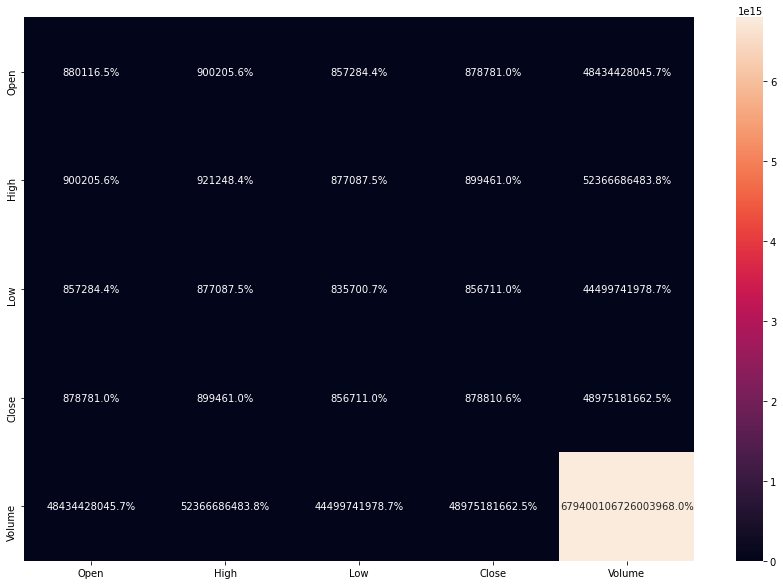

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.cov(),annot=True, fmt=".1%")  # Representation of cov() information in form of heatmap

In [15]:
data.corr()                   # corr() function gives correlation between various columns or data fields

Open      High       Low     Close    Volume
Open    1.000000  0.999731  0.999607  0.999224  0.062636
High    0.999731  1.000000  0.999607  0.999646  0.066192
Low     0.999607  0.999607  1.000000  0.999681  0.059057
Close   0.999224  0.999646  0.999681  1.000000  0.063382
Volume  0.062636  0.066192  0.059057  0.063382  1.000000

<AxesSubplot:>

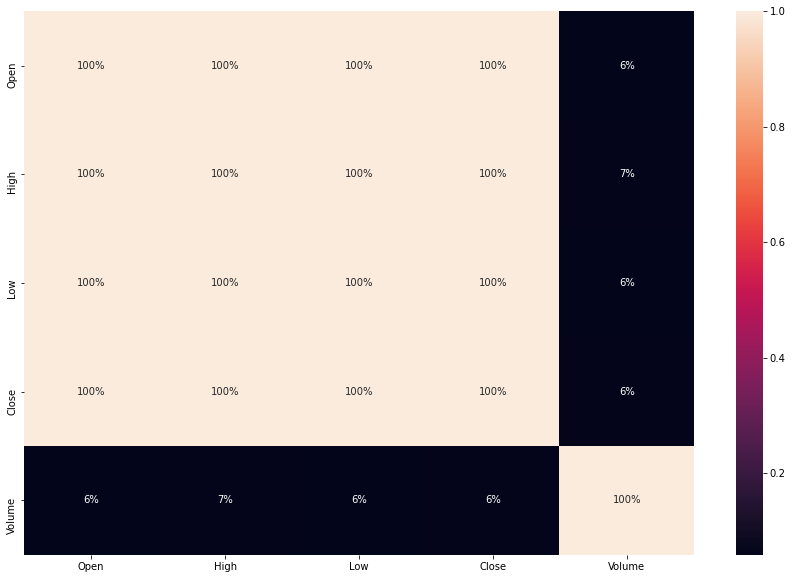

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.0%')       # representation of corr() in form of heatmaps

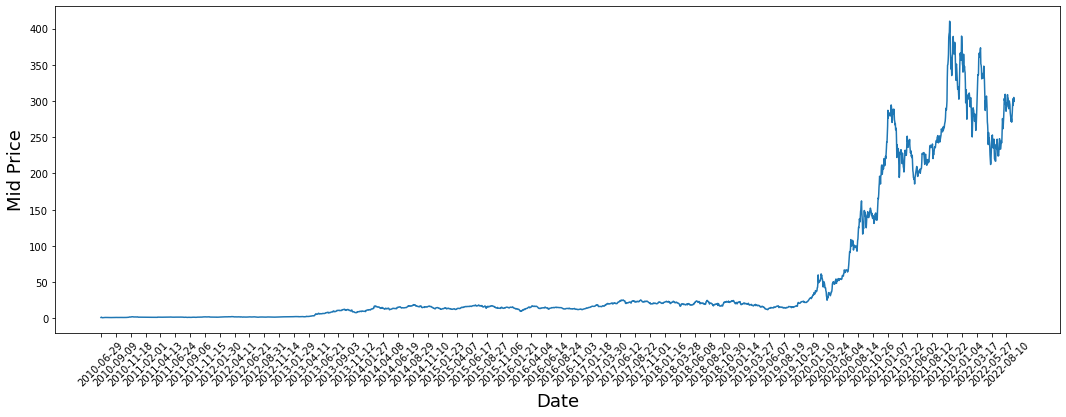

In [17]:
# Plotting Mid Price with dates

plt.rcParams['figure.figsize']=(18,6)
plt.plot(range(data.shape[0]),(data['High']+data['Low'])/2.0)
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize='18')
plt.ylabel('Mid Price',fontsize=18)
plt.show()

# Step 4 : Modelling the Data

In [18]:
from sklearn.model_selection import train_test_split         # train_test_split() divides data in training data and testing
                                                             # data.This make sure that training/testing data is not biased

train, test = train_test_split(data, test_size=0.20,random_state=0)
train = train.sort_index()

In [19]:
X_train = np.array(train.index).reshape(-1, 1)             # We have selected dates for prediction
y_train = train['Close']

### Linear Regression

In [20]:
# We will first try Linear regression Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()        # model creation
lin_reg.fit(X_train,y_train)          # training the model
print("Slope", lin_reg.coef_)          # prints slope value
print("Intercept", lin_reg.intercept_) # prints intercept value 

Slope [0.05123955]
Intercept -37666.96842740999


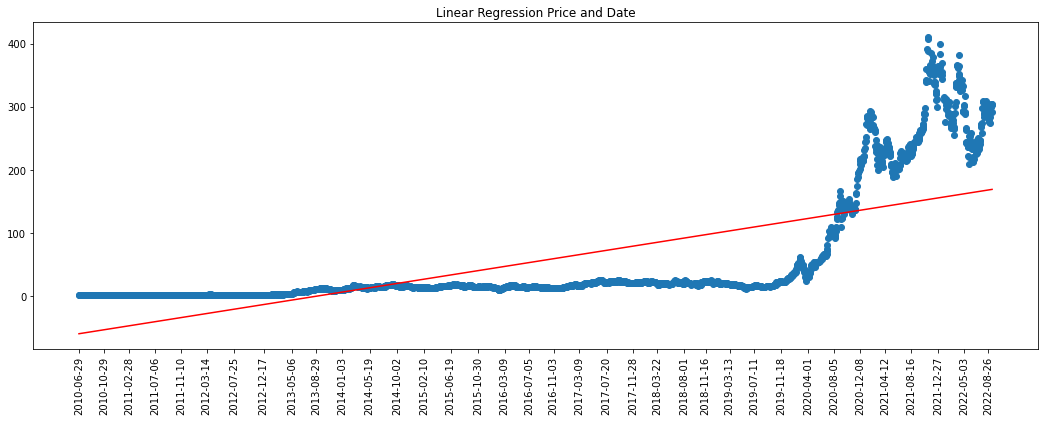

In [21]:
# Visualizing the predictions of Linear Model

pred=lin_reg.predict(X_train)
plt.rcParams['figure.figsize']=(18,6)
plt.title('Linear Regression Price and Date')
plt.scatter(X_train,y_train,label='Actual Price')
plt.plot(X_train,pred,color='r',label='Predicted Price')
plt.xticks(train.index[::70],train['Date'].loc[::70],rotation='vertical')
plt.show()

In [22]:
# Preparing Testing Data

test.sort_index()
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close'] # target, actual value 
y_pred = lin_reg.predict(X_test) # predicted value
df_sample=pd.DataFrame({'Date':test['Date'],'Actual':y_test,'Prediction':y_pred,'Error':(y_test-y_pred)}).tail(10)
df_sample

Date      Actual  Prediction      Error
ordinal                                               
737761   2020-12-02  189.606674  135.573559  54.033115
737172   2019-04-23   17.593332  105.393464 -87.800132
736496   2017-06-16   24.760000   70.755528 -45.995528
735473   2014-08-28   17.590668   18.337468  -0.746800
737573   2020-05-28   53.720669  125.940524 -72.219855
735100   2013-08-20    9.972000   -0.774885  10.746885
734613   2012-04-20    2.210667  -25.728546  27.939213
737291   2019-08-20   15.057333  111.490970 -96.433637
734570   2012-03-08    2.204667  -27.931846  30.136513
736004   2016-02-10    9.578000   45.545669 -35.967669

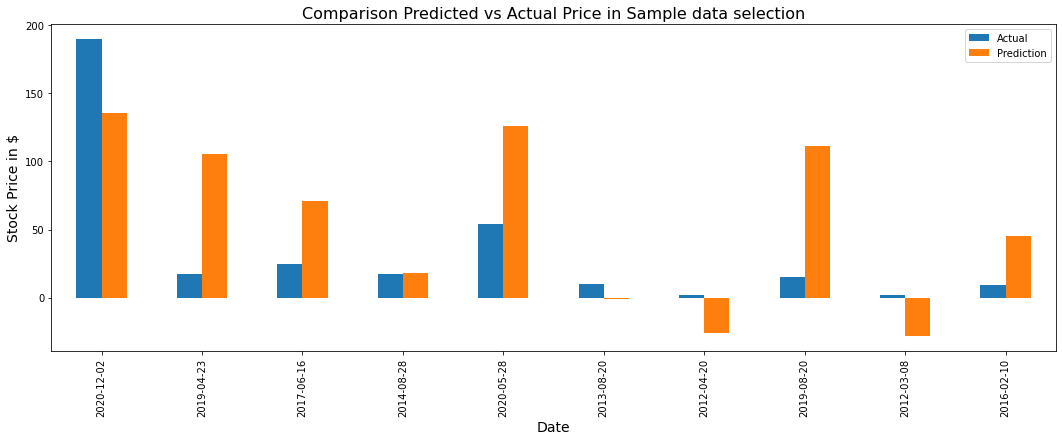

In [23]:
# Comparing Prediction and Actual values of Testing Data of top 10 values

fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Actual', 'Prediction'], kind='bar', ax=ax)
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)
plt.show()

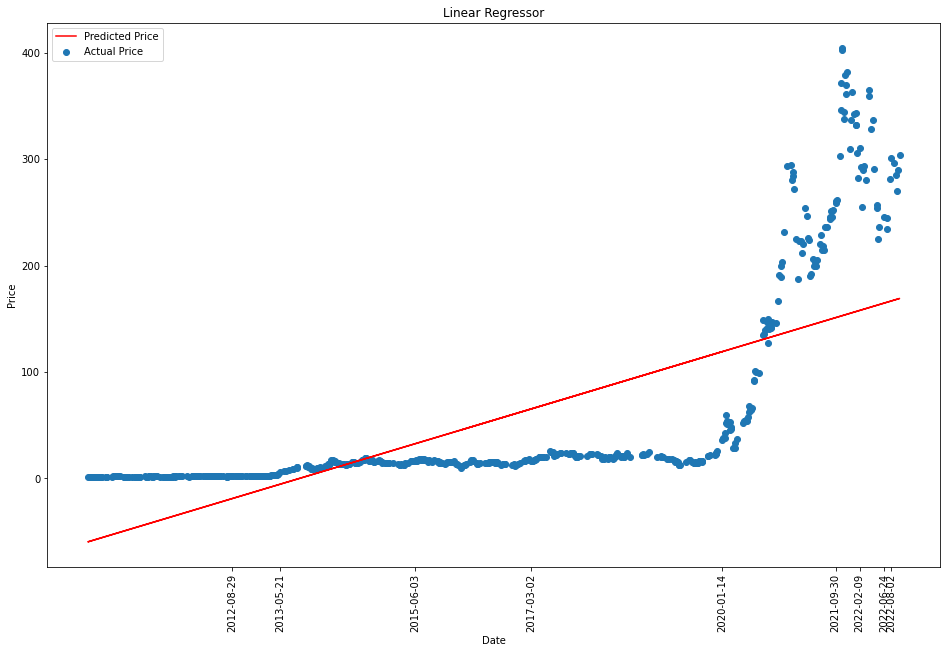

In [24]:
# Plotting Predicted values as a line and Actual values as scattered points of testing data

plt.figure(1, figsize=(16,10))
plt.title('Price vs Date')
plt.plot(X_test, lin_reg.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::70],test['Date'].loc[::70],rotation='vertical')
plt.title('Linear Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Quadratic Regression

d:\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.58445e-47): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


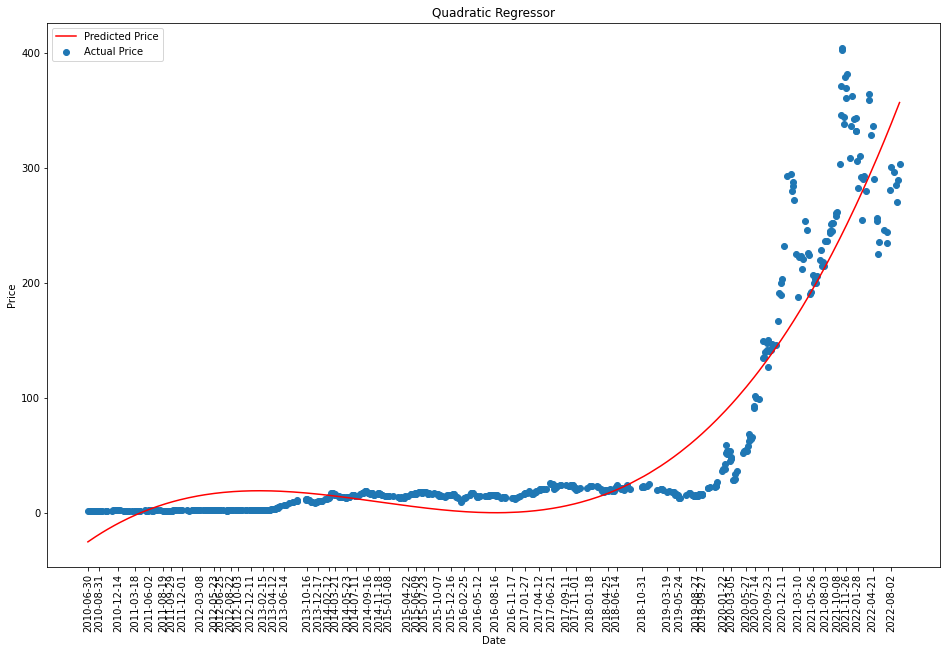

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

test=test.sort_index()
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close'] # target, actual value 

qr = make_pipeline(PolynomialFeatures(4),Ridge())
qr.fit(X_train,y_train)
y_pred = qr.predict(X_test)

# Plotting Predicted values as a line and Actual values as scattered points of testing data
plt.figure(1, figsize=(16,10))
plt.title('Price vs Date')
plt.plot(X_test, qr.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::10],test['Date'].loc[::10],rotation='vertical')
plt.title('Quadratic Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### K Neighbors Regressor

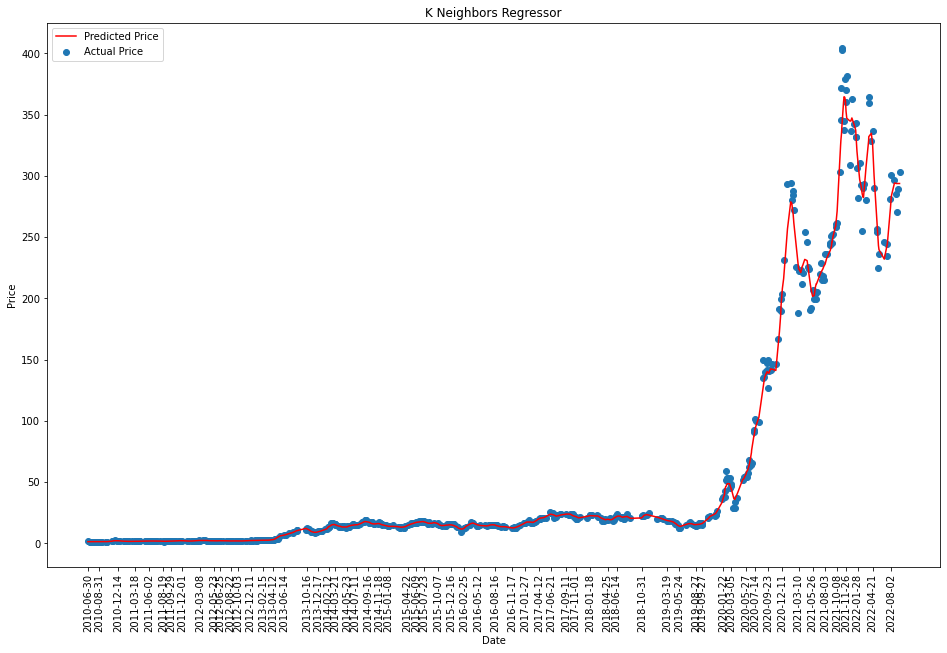

In [26]:
from sklearn.neighbors import KNeighborsRegressor

KNN_model = KNeighborsRegressor(n_neighbors=21).fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

# Plotting Predicted values as a line and Actual values as scattered points of testing data
plt.figure(1, figsize=(16,10))
plt.plot(X_test, KNN_model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::10],test['Date'].loc[::10],rotation='vertical')
plt.title('K Neighbors Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Decision Tree Regressor

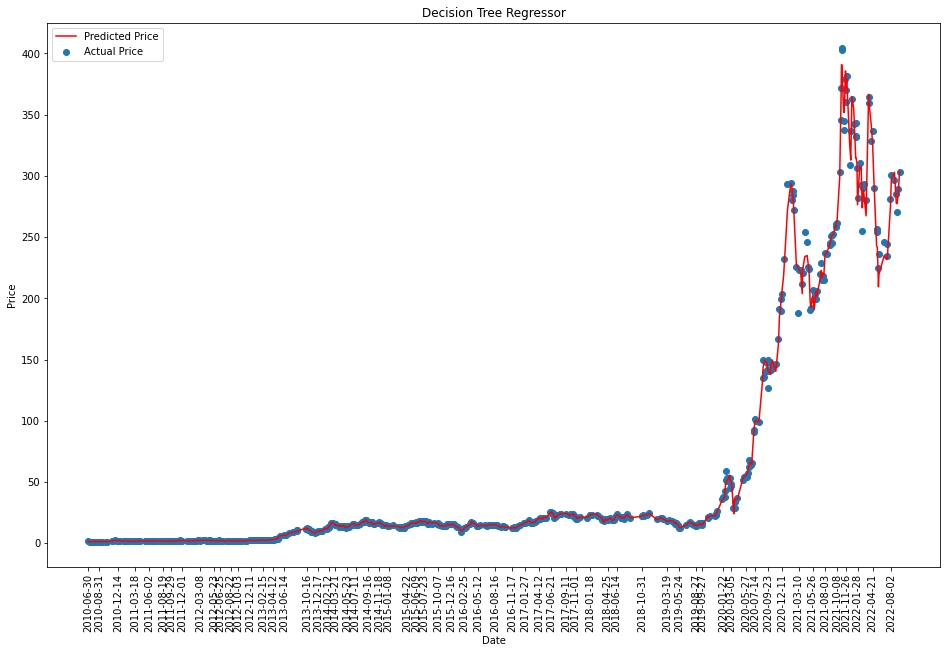

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

# Plotting Predicted values as a line and Actual values as scattered points of testing data
plt.figure(1, figsize=(16,10))
plt.plot(X_test, tree.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::10],test['Date'].loc[::10],rotation='vertical')
plt.title('Decision Tree Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Random Forest Regressor

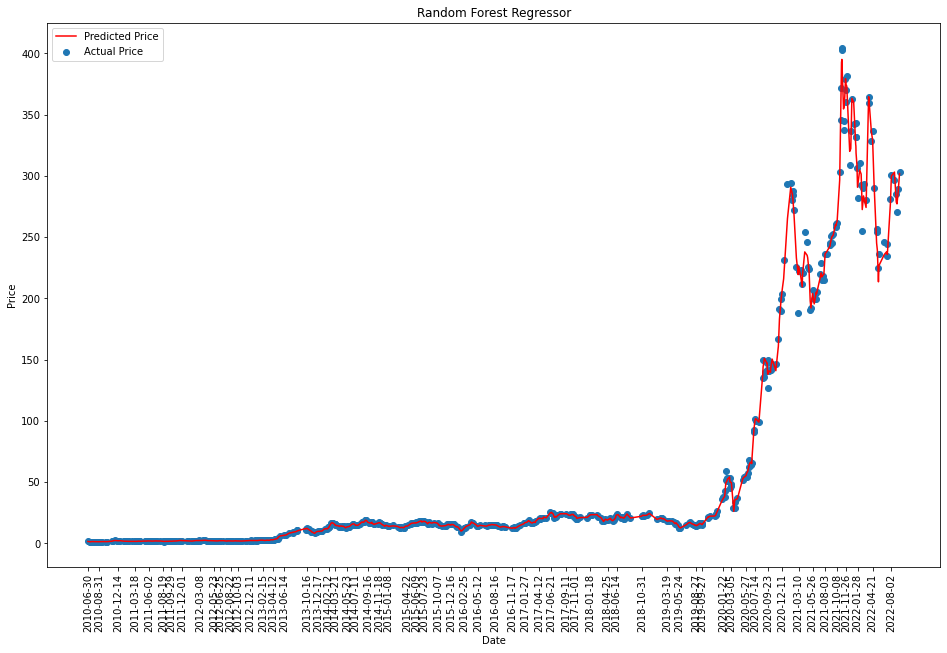

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 200, random_state = 0)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

# Plotting Predicted values as a line and Actual values as scattered points of testing data
plt.figure(1, figsize=(16,10))
plt.plot(X_test, forest.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')
plt.xticks(test.index[::10],test['Date'].loc[::10],rotation='vertical')
plt.title('Random Forest Regressor')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 5 : Model Evaluation

In [29]:
s1 = lin_reg.score(X_test,y_test)
s2 = qr.score(X_test,y_test)
s3 = KNN_model.score(X_test,y_test)
s4 = tree.score(X_test,y_test)
s5 = forest.score(X_test,y_test)

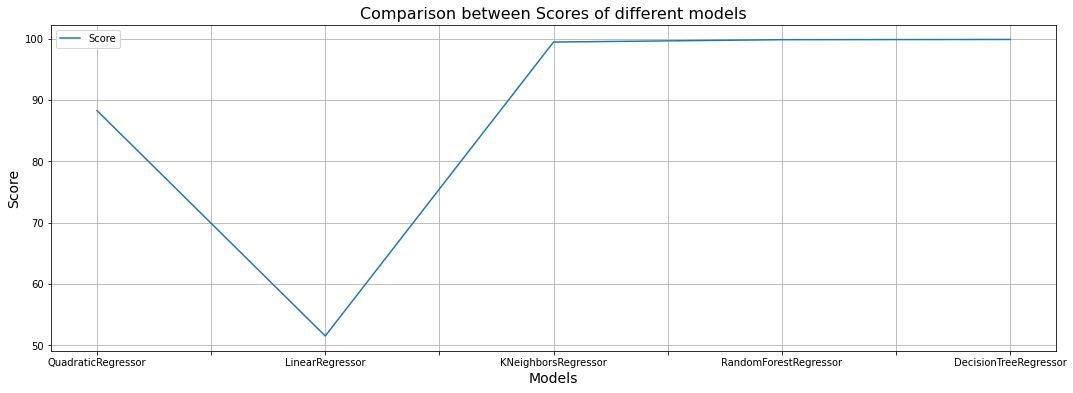

In [30]:
Models = ['QuadraticRegressor','LinearRegressor','KNeighborsRegressor','RandomForestRegressor','DecisionTreeRegressor']
Scores = [s2*100,s1*100,s3*100,s4*100,s5*100]

score_data=pd.DataFrame({'Model':Models,'Score':Scores})

score_data.plot(x='Model', y=['Score'], kind='line')

plt.title('Comparison between Scores of different models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid()
plt.show()

In [31]:
score_data

Model      Score
0     QuadraticRegressor  88.256696
1        LinearRegressor  51.501009
2    KNeighborsRegressor  99.422391
3  RandomForestRegressor  99.807574
4  DecisionTreeRegressor  99.844859

## Hence Decision Tree Regressor will be final model

# Step 6 : Model Deployment

### Using Simple input output via screen

In [32]:
def predict():
    date = input('Enter date for which you want to predict Stock price of Tesla in "YYYY-mm-dd" format : ')
    pr_value = tree.predict([[toOrdinal(date)]])[0]
    print("The stock Price of Tesla on ",date," is $",pr_value,sep="")
    
#predict()
#Uncomment above line to use jupyter notebook to predict

### To deploy it in python server we will convert it into pickle file

In [33]:
import pickle

with open("Final Model.pickle","wb") as f:
    pickle.dump(tree,f)